In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

# Class 5: Managing Data with Pandas 

Pandas is a Python library for managing datasets. Documentation and examples are available on the website for Pandas: http://pandas.pydata.org/. 

In this Notebook, we'll make use of a dataset containing long-run averages of inflation, money growth, and real GDP. The dataset is available here: https://www.briancjenkins.com/data/csv/qtyTheoryData.csv (Python code to generate the dataset: https://github.com/letsgoexploring/economic-data). Recall that the quantity theory of money implies the following linear relationship between the long-run rate of money growth, the long-run rate of inflation, and the long-run rate of real GDP growth in a country:

\begin{align}
\text{inflation} & = \text{money growth} - \text{real GDP growth},
\end{align}

Generally, we treat real GDP growth and money supply growth as exogenous so this is a theory about the determination of inflation.

### Import Pandas

In [2]:
import pandas as pd

### Import data from a csv file

Pandas has a function called `read_csv()` for reading data from a csv file into a Pandas `DataFrame` object.

In [52]:
# Import quantity theory data into a Pandas DataFrame called 'df' with country names as the index.

# Directly from internet
df = pd.read_csv('https://www.briancjenkins.com/data/csv/qtyTheoryData.csv')

# From current working directory
# df = pd.read_csv('qtyTheoryData.csv')

In [53]:
# Print the first 5 rows
print(df.head())

               country iso code  observations  inflation  money growth  \
0              Albania      ALB            21    0.05186       0.12230   
1              Algeria      DZA            51    0.10688       0.16024   
2               Angola      AGO            20    0.82783       1.00940   
3  Antigua and Barbuda      ATG            38    0.03943       0.09630   
4            Argentina      ARG            54    0.73168       0.77245   

   gdp growth  
0     0.04594  
1     0.03818  
2     0.08146  
3     0.03575  
4     0.02422  


In [54]:
# Print the last 10 rows
print(df.tail(10))

                  country iso code  observations  inflation  money growth  \
168               Ukraine      UKR            23    0.58513       0.55392   
169  United Arab Emirates      ARE            40    0.03566       0.13659   
170         United States      USA            54    0.03377       0.05644   
171               Uruguay      URY            54    0.36846       0.40479   
172               Vanuatu      VUT            36    0.03509       0.08102   
173         Venezuela, RB      VEN            53    0.20298       0.26996   
174    West Bank and Gaza      PSE            17    0.03632       0.11749   
175           Yemen, Rep.      YEM            24    0.14113       0.13238   
176                Zambia      ZMB            27    0.21917       0.23465   
177              Zimbabwe      ZWE            32   -0.00124      -0.12919   

     gdp growth  
168    -0.01023  
169     0.04688  
170     0.03081  
171     0.02251  
172     0.02889  
173     0.02740  
174     0.03186  
175     

In [55]:
# Print the type of variable 'df'
print(type(df))

<class 'pandas.core.frame.DataFrame'>


### Properties of `DataFrame` objects

Like entries in a spreadsheet file, elements in a `DataFrame` object have row (or *index*) and column coordinates. Column names are always strings. Index elements can be integers, strings, or dates.

In [59]:
# Print the columns of df
print(df.columns)

Index(['country', 'iso code', 'observations', 'inflation', 'money growth',
       'gdp growth'],
      dtype='object')


In [60]:
# Create a new variable called money equal to the 'money growth' column and print
money = df['money growth']
print(money)

0      0.12230
1      0.16024
2      1.00940
3      0.09630
4      0.77245
5      0.46411
6      0.08128
7      0.10181
8      0.07491
9      0.50149
10     0.06965
11     0.08263
12     0.13523
13     0.10833
14     0.61733
15     0.06306
16     0.11148
17     0.10734
18     0.18748
19     0.42180
20     0.19611
21     0.15783
22     0.89717
23     0.02883
24     0.34614
25     0.10509
26     0.13430
27     0.09847
28     0.21306
29     0.09689
        ...   
148    0.12114
149    0.14659
150    0.09518
151    0.09639
152    0.29333
153    0.29243
154    0.14436
155    0.10587
156    0.06059
157    0.15539
158    0.30609
159    0.20918
160    0.09645
161    0.18530
162    0.09973
163    0.09616
164    0.11841
165    0.10958
166    0.37305
167    0.36831
168    0.55392
169    0.13659
170    0.05644
171    0.40479
172    0.08102
173    0.26996
174    0.11749
175    0.13238
176    0.23465
177   -0.12919
Name: money growth, Length: 178, dtype: float64


In [61]:
# Print the type of the variable money
print(type(money))

<class 'pandas.core.series.Series'>


A Pandas `Series` stores one column of data. Like a `DataFrame`, a `Series` object has an index. Note that `money` has the same index as `df`. Instead of having a column, the `Series` has a `name` attribute.

In [62]:
# Print the name of the 'money' variable
print(money.name)

money growth


Select multiple columns of a `DataFrame` by puting the desired column names in a set a of square brackets (i.e., in a `list`).

In [64]:
# Print the first 5 rows of just the inflation, money growth, and gdp growth columns
print(df[['inflation','money growth','gdp growth']].head())

   inflation  money growth  gdp growth
0    0.05186       0.12230     0.04594
1    0.10688       0.16024     0.03818
2    0.82783       1.00940     0.08146
3    0.03943       0.09630     0.03575
4    0.73168       0.77245     0.02422


As mentioned, the set of row coordinates is the index. Unless specified otherwise, Pandas automatically assigns an integer index starting at 0 to rows of the `DataFrame`.

In [67]:
# Print the index of 'df'
print(df.index)

RangeIndex(start=0, stop=178, step=1)


Note that in the index of the `df` is the numbers 0 through 177. We could have specified a different index when we imported the data using `read_csv()`. For example, suppose we want to the country names to be the index of `df`. Since country names are in the first column of the data file, we can pass the argument `index_col=0` to `read_csv()`

In [70]:
# Import quantity theory data into a Pandas DataFrame called 'df' with country names as the index.
df = pd.read_csv('https://www.briancjenkins.com/data/csv/qtyTheoryData.csv',index_col=0)

# Print first 5 rows of df
print(df.head())

                    iso code  observations  inflation  money growth  \
country                                                               
Albania                  ALB            21    0.05186       0.12230   
Algeria                  DZA            51    0.10688       0.16024   
Angola                   AGO            20    0.82783       1.00940   
Antigua and Barbuda      ATG            38    0.03943       0.09630   
Argentina                ARG            54    0.73168       0.77245   

                     gdp growth  
country                          
Albania                 0.04594  
Algeria                 0.03818  
Angola                  0.08146  
Antigua and Barbuda     0.03575  
Argentina               0.02422  


Use the `loc` attribute to select rows of the `DataFrame` by index *values*.

In [73]:
# Create a new variable called 'df_usa' equal to the 'United States' row and print
df_usa = df.loc['United States']
print(df_usa)

iso code            USA
observations         54
inflation       0.03377
money growth    0.05644
gdp growth      0.03081
Name: United States, dtype: object


Use `iloc` attribute to select row based on integer location (starting from 0).

In [75]:
# Create a new variable called 'df_third' equal to the third row in the DataFrame and print
df_first = df.iloc[2]
print(df_first)

iso code            AGO
observations         20
inflation       0.82783
money growth     1.0094
gdp growth      0.08146
Name: Angola, dtype: object


There are several ways to return a single element of a Pandas `DataFrame`. For example, here are three that we want to return the value of inflation for the United States from the DataFrame `df`:

1. `df.loc['United States','inflation']`
2. `df.loc['United States']['inflation']`
3. `df['inflation'].loc['United States']`

The first method points directly to the element in the `df` while the second and third methods return *copies* of the element. That means that you can modify the value of inflation for the United States by running:

    df.loc['United States','inflation'] = new_value
    
But running either:

    df.loc['United States']['inflation'] = new_value
    
or:

    df['inflation'].loc['United States'] = new_value

will return an error.

In [80]:
# Print the inflation rate of the United States  (By index and column together)
print('Long-run average inflation in US: ',df.loc['United States','inflation'])

Long-run average inflation in US:  4.0


In [81]:
# Print the inflation rate of the United States (first by index, then by column)
print('Long-run average inflation in US: ',df.loc['United States']['inflation'])

Long-run average inflation in US:  4.0


In [82]:
# Print the inflation rate of the United States  (first by column, then by index)
print('Long-run average inflation in US: ',df['inflation'].loc['United States'])

Long-run average inflation in US:  4.0


New columns are easily created as functions of existing columns.

In [83]:
# Create a new column called 'difference' equal to the money growth column minus 
# the inflation column and print the modified DataFrame
df['difference'] = df['money growth'] - df['inflation']
print(df['difference'])

country
Albania                           0.07044
Algeria                           0.05336
Angola                            0.18157
Antigua and Barbuda               0.05687
Argentina                         0.04077
Armenia                           0.02154
Aruba                             0.04959
Australia                         0.05106
Austria                           0.05845
Azerbaijan                        0.07387
Bahamas, The                      0.02115
Bahrain                           0.05318
Bangladesh                        0.05657
Barbados                          0.04723
Belarus                           0.02929
Belgium                           0.04654
Belize                            0.08926
Benin                             0.05905
Bhutan                            0.12045
Bolivia                           0.08569
Bosnia and Herzegovina            0.15565
Botswana                          0.06462
Brazil                            0.03037
Brunei Darussalam         

In [84]:
# Print the average difference between money growth and inflation
print(df.difference.mean())

0.03853865168539324


In [85]:
# Remove the following columns from the DataFrame: 'is code','observations','difference'
df = df.drop(['observations','difference'],axis=1)

# Print the modified DataFrame
print(df)

                               iso code  inflation  money growth  gdp growth
country                                                                     
Albania                             ALB    0.05186       0.12230     0.04594
Algeria                             DZA    0.10688       0.16024     0.03818
Angola                              AGO    0.82783       1.00940     0.08146
Antigua and Barbuda                 ATG    0.03943       0.09630     0.03575
Argentina                           ARG    0.73168       0.77245     0.02422
Armenia                             ARM    0.44257       0.46411     0.05471
Aruba                               ABW    0.03169       0.08128     0.00825
Australia                           AUS    0.05075       0.10181     0.03461
Austria                             AUT    0.01646       0.07491     0.01446
Azerbaijan                          AZE    0.42762       0.50149     0.05468
Bahamas, The                        BHS    0.04850       0.06965     0.01829

### Methods

A Pandas `DataFrame` has a bunch of useful methods defined for it. `describe()` returns some summary statistics.

In [86]:
# Print the summary statistics for 'df'
print(df.describe())

        inflation  money growth  gdp growth
count  178.000000    178.000000  178.000000
mean     0.146234      0.184773    0.036382
std      0.334181      0.163258    0.021763
min     -0.001240     -0.129190   -0.023680
25%      0.041353      0.099833    0.023447
50%      0.069585      0.137390    0.036875
75%      0.128963      0.198862    0.046857
max      4.000000      1.171190    0.159540


The `corr()` method returns a `DataFrame` containing the correlation coefficients of the specified `DataFrame`.

In [87]:
# Create a variable called 'correlations' containg the correlation coefficients for columns in 'df'
correlations = df.corr()

# Print the correlation coefficients
print(correlations)

              inflation  money growth  gdp growth
inflation       1.00000      0.428320   -0.038620
money growth    0.42832      1.000000    0.084328
gdp growth     -0.03862      0.084328    1.000000


In [88]:
# Print the correlation coefficient for inflation and money growth
print('corr of inflation and money growth: ',round(correlations.loc['inflation','money growth'],4))

# Print the correlation coefficient for inflation and real GDP growth
print('corr of inflation and gdp growth:   ',round(correlations.loc['inflation','gdp growth'],4))

# Print the correlation coefficient for money growth and real GDP growth
print('corr of money growth and gdp growth:',round(correlations.loc['money growth','gdp growth'],4))

corr of inflation and money growth:  0.4283
corr of inflation and gdp growth:    -0.0386
corr of money growth and gdp growth: 0.0843


`sort_values()` returns a copy of the original `DataFrame` sorted along the given column. The optional argument `ascending` is set to `True` by default, but can be changed to `False` if you want to print the lowest first.

In [89]:
# Print rows for the countries with the 10 lowest inflation rates
print(df.sort_values('inflation').head(10))

                     iso code  inflation  money growth  gdp growth
country                                                           
Zimbabwe                  ZWE   -0.00124      -0.12919     0.00813
Djibouti                  DJI    0.00033       0.07611     0.01616
Germany                   DEU    0.01049       0.07344     0.01155
Ireland                   IRL    0.01375       0.12348     0.03326
Hong Kong SAR, China      HKG    0.01391       0.09846     0.03618
France                    FRA    0.01461       0.06584     0.01233
Kosovo                    KSV    0.01540       0.08659     0.03359
Greece                    GRC    0.01611       0.01423    -0.00452
Austria                   AUT    0.01646       0.07491     0.01446
Finland                   FIN    0.01647       0.06528     0.01387


In [90]:
# Print rows for the countries with the 10 highest inflation rates
print(df.sort_values('inflation',ascending=False).head(10))

                 iso code  inflation  money growth  gdp growth
country                                                       
United States         USA    4.00000       0.05644     0.03081
Congo, Dem. Rep.      COD    1.22097       1.17119    -0.00232
Brazil                BRA    0.86680       0.89717     0.04129
Angola                AGO    0.82783       1.00940     0.08146
Argentina             ARG    0.73168       0.77245     0.02422
Nicaragua             NIC    0.61301       0.66175     0.02475
Belarus               BLR    0.58804       0.61733     0.04919
Ukraine               UKR    0.58513       0.55392    -0.01023
Peru                  PER    0.47231       0.53655     0.03444
Armenia               ARM    0.44257       0.46411     0.05471


In [91]:
# Print df with the index descending alphabetical order
print(df.sort_index(ascending=False))

                               iso code  inflation  money growth  gdp growth
country                                                                     
Zimbabwe                            ZWE   -0.00124      -0.12919     0.00813
Zambia                              ZMB    0.21917       0.23465     0.01163
Yemen, Rep.                         YEM    0.14113       0.13238     0.03838
West Bank and Gaza                  PSE    0.03632       0.11749     0.03186
Venezuela, RB                       VEN    0.20298       0.26996     0.02740
Vanuatu                             VUT    0.03509       0.08102     0.02889
Uruguay                             URY    0.36846       0.40479     0.02251
United States                       USA    4.00000       0.05644     0.03081
United Arab Emirates                ARE    0.03566       0.13659     0.04688
Ukraine                             UKR    0.58513       0.55392    -0.01023
Uganda                              UGA    0.26869       0.36831     0.05673

Note that `sort_values` and `sort_index` return *copies* of the original `DataFrame`. If, in the previous example, we had wanted to actually modify `df`, we would have need to explicitly overwrite it:

    df = df.sort_index(ascending=False)

### Quick plotting example

Construct a graph that visually confirms the quantity theory of money by making a scatter plot with average money growth on the horizontal axis and average inflation on the vertical axis. Set the marker size `s` to 50 and opacity (`alpha`) 0.25. Add a 45 degree line, axis labels, and a title.

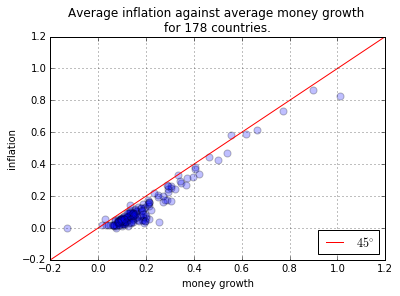

In [92]:
# Create data for 45 degree line
x45 = [-0.2,1.2]
y45 = [-0.2,1.2]

# Create figure and axis
fig = plt.figure()
ax = fig.add_subplot(1,1,1)


# Plot 45 degree line and create legend in lower right corner
ax.plot(x45,y45,'-r',label = '$45^{\circ}$')
ax.legend(loc='lower right')

# Scatter plot of data inflation against money growth
ax.scatter(df['money growth'],df['inflation'],s=50,alpha = 0.25)
ax.set_xlim([-0.2,1.2])
ax.set_ylim([-0.2,1.2])
ax.set_xlabel('money growth')
ax.set_ylabel('inflation')
ax.set_title('Average inflation against average money growth \nfor '+str(len(df.index))+' countries.')
ax.grid()

### Exporting a `DataFrame` to csv

Use the DataFrame method `to_csv()` to export DataFrame to a csv file.

In [93]:
# Export the DataFrame 'df' to a csv file called 'modified_data.csv'.
df.to_csv('modified_data.csv')